# Methods of calculating gas costs

I went down the rabit hole of how to calculate gas costs from client benchmarks and whether it is better to first normalise the performance data within a client or not. @misilva73 mostly convinced me that is correct, this notebook is to experimentally verify this. TL;DR, normalising the data first is not the right way.

In [1]:
import matplotlib.pyplot as plt

from math import ceil
from random import random, seed
seed(42)

EXEC_DEADLINE = 1000
NUM_OPCODES = 16

In [2]:
# Helper Functions
normalize = lambda x: [ceil(y / x[0]) for y in x]
smallest_item_first = lambda lst: [min(lst)] + [x for i, x in enumerate(lst) if i != lst.index(min(lst))]

In [3]:
# clients take random amounts of time to 
client_a = smallest_item_first([random() for _ in range(NUM_OPCODES)])
client_b = smallest_item_first([random() for _ in range(NUM_OPCODES)])
client_c = smallest_item_first([2 * random() for _ in range(NUM_OPCODES)])  # client_c is 2x slower on average

In [4]:
worst_case_prices = normalize([max(x) for x in zip(client_a, client_b, client_c)])
normalized_prices = [max(x) for x in zip(normalize(client_a), normalize(client_b), normalize(client_c))]

num_opcodes_wc = [EXEC_DEADLINE // x for x in worst_case_prices]
num_opcodes_np = [EXEC_DEADLINE // x for x in normalized_prices]

slowest_client_wc = [a * b for a,b in zip(num_opcodes_wc, [max(x) for x in zip(client_a, client_b, client_c)])]
slowest_client_np = [a * b for a,b in zip(num_opcodes_np, [max(x) for x in zip(client_a, client_b, client_c)])]

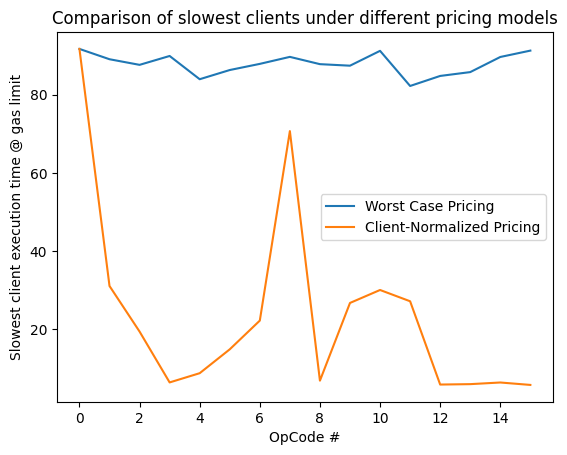

In [5]:
plt.plot(slowest_client_wc, label='Worst Case Pricing')
plt.plot(slowest_client_np, label='Client-Normalized Pricing')
plt.xlabel("OpCode #")
plt.ylabel("Slowest client execution time @ gas limit")
plt.legend()
plt.title('Comparison of slowest clients under different pricing models')
plt.show()